In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../utils/')
import imp
import plot_tools
imp.reload(plot_tools)
import pandas as pd
import networkx as nx
from measures import measures_calculator,matchY
from torchvision import datasets
from collections import  Counter

import api
imp.reload(api)
import time
import pickle

def set_seed(seed=1):
    import random
    random.seed(seed)
    np.random.seed(seed)

In [29]:
class DataLoader:
    def __init__(self):
        pass
    
    @classmethod
    def load(self,name):
        if name=='PCA_MNIST_5':
            X = pickle.load(open('./embedding/PCA_MNIST_X_5.pkl','rb'))
            Hidden = pickle.load(open('./embedding/PCA_MNIST_Hidden_5.pkl','rb'))
            Y = pickle.load(open('./embedding/PCA_MNIST_Y_5.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='PCA_MNIST_10':
            X = pickle.load(open('./embedding/PCA_MNIST_X_10.pkl','rb'))
            Hidden = pickle.load(open('./embedding/PCA_MNIST_Hidden_10.pkl','rb'))
            Y = pickle.load(open('./embedding/PCA_MNIST_Y_10.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='PCA_MNIST_20':
            X = pickle.load(open('./embedding/PCA_MNIST_X_20.pkl','rb'))
            Hidden = pickle.load(open('./embedding/PCA_MNIST_Hidden_20.pkl','rb'))
            Y = pickle.load(open('./embedding/PCA_MNIST_Y_20.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='PCA_MNIST_30':
            X = pickle.load(open('./embedding/PCA_MNIST_X_30.pkl','rb'))
            Hidden = pickle.load(open('./embedding/PCA_MNIST_Hidden_30.pkl','rb'))
            Y = pickle.load(open('./embedding/PCA_MNIST_Y_30.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='PCA_FMNIST_5':
            X = pickle.load(open('./embedding/PCA_FMNIST_X_5.pkl','rb'))
            Hidden = pickle.load(open('./embedding/PCA_FMNIST_Hidden_5.pkl','rb'))
            Y = pickle.load(open('./embedding/PCA_FMNIST_Y_5.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='PCA_FMNIST_10':
            X = pickle.load(open('./embedding/PCA_FMNIST_X_10.pkl','rb'))
            Hidden = pickle.load(open('./embedding/PCA_FMNIST_Hidden_10.pkl','rb'))
            Y = pickle.load(open('./embedding/PCA_FMNIST_Y_10.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='PCA_FMNIST_20':
            X = pickle.load(open('./embedding/PCA_FMNIST_X_20.pkl','rb'))
            Hidden = pickle.load(open('./embedding/PCA_FMNIST_Hidden_20.pkl','rb'))
            Y = pickle.load(open('./embedding/PCA_FMNIST_Y_20.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='PCA_FMNIST_30':
            X = pickle.load(open('./embedding/PCA_FMNIST_X_30.pkl','rb'))
            Hidden = pickle.load(open('./embedding/PCA_FMNIST_Hidden_30.pkl','rb'))
            Y = pickle.load(open('./embedding/PCA_FMNIST_Y_30.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        
        
        if name=='AE_MNIST_5':
            X = pickle.load(open('./embedding/AE_MNIST_X_5.pkl','rb'))
            Hidden = pickle.load(open('./embedding/AE_MNIST_Hidden_5.pkl','rb'))
            Y = pickle.load(open('./embedding/AE_MNIST_Y_5.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='AE_MNIST_10':
            X = pickle.load(open('./embedding/AE_MNIST_X_10.pkl','rb'))
            Hidden = pickle.load(open('./embedding/AE_MNIST_Hidden_10.pkl','rb'))
            Y = pickle.load(open('./embedding/AE_MNIST_Y_10.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='AE_MNIST_20':
            X = pickle.load(open('./embedding/AE_MNIST_X_20.pkl','rb'))
            Hidden = pickle.load(open('./embedding/AE_MNIST_Hidden_20.pkl','rb'))
            Y = pickle.load(open('./embedding/AE_MNIST_Y_20.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='AE_MNIST_30':
            X = pickle.load(open('./embedding/AE_MNIST_X_30.pkl','rb'))
            Hidden = pickle.load(open('./embedding/AE_MNIST_Hidden_30.pkl','rb'))
            Y = pickle.load(open('./embedding/AE_MNIST_Y_30.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='AE_FMNIST_5':
            X = pickle.load(open('./embedding/AE_FMNIST_X_5.pkl','rb'))
            Hidden = pickle.load(open('./embedding/AE_FMNIST_Hidden_5.pkl','rb'))
            Y = pickle.load(open('./embedding/AE_FMNIST_Y_5.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='AE_FMNIST_10':
            X = pickle.load(open('./embedding/AE_FMNIST_X_10.pkl','rb'))
            Hidden = pickle.load(open('./embedding/AE_FMNIST_Hidden_10.pkl','rb'))
            Y = pickle.load(open('./embedding/AE_FMNIST_Y_10.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='AE_FMNIST_20':
            X = pickle.load(open('./embedding/AE_FMNIST_X_20.pkl','rb'))
            Hidden = pickle.load(open('./embedding/AE_FMNIST_Hidden_20.pkl','rb'))
            Y = pickle.load(open('./embedding/AE_FMNIST_Y_20.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='AE_FMNIST_30':
            X = pickle.load(open('./embedding/AE_FMNIST_X_30.pkl','rb'))
            Hidden = pickle.load(open('./embedding/AE_FMNIST_Hidden_30.pkl','rb'))
            Y = pickle.load(open('./embedding/AE_FMNIST_Y_30.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='mnist_784':
            dataset2 = datasets.MNIST('../data', train=True, download=True)
            N=dataset2.test_data.shape[0]
            X=dataset2.test_data.numpy().reshape(N,784)/255
            Y_true=dataset2.test_labels.numpy()
            return X,Y_true
        
        if name=='fmnist_784':
            dataset2 = datasets.FashionMNIST('../data', train=True, download=True)
            N=dataset2.test_data.shape[0]
            X=dataset2.test_data.numpy().reshape(N,784)/255
            Y_true=dataset2.test_labels.numpy()
            return X,Y_true

# GIT

## PCA_MNIST

In [11]:
X_raw,X,Y_true=DataLoader.load('PCA_MNIST_5')

K = [30,40,50,60,70,80,90,100]
fscore = []
for k in K:
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                      k=k,
                      target_ratio=[ 1 for i in range(10)],
                      plot=False,
                     ) # best k:70

    Y_pred,Y_true=matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    fscore.append(result['f1'].values[0])
print(fscore)

[0.38423619080817023, 0.46836234583256997, 0.411096868005032, 0.47375697816549356, 0.47835542542762316, 0.45132035237857926, 0.39486054142914767, 0.47766850577472386]


In [12]:
X_raw,X,Y_true=DataLoader.load('PCA_MNIST_10')

K = [30,40,50,60,70,80,90,100]
fscore = []
for k in K:
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                      k=k,
                      target_ratio=[ 1 for i in range(10)],
                      plot=False,
                     ) # best k:70

    Y_pred,Y_true=matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    fscore.append(result['f1'].values[0])
print(fscore)

[0.6100749131725856, 0.6326456317359811, 0.6077193974977525, 0.7284356983373874, 0.6915151585356772, 0.7032023118108742, 0.6857712677513192, 0.6481119746425283]


In [19]:
X_raw,X,Y_true=DataLoader.load('PCA_MNIST_20')

K = [30,40,50,60,70,80,90,100]
fscore = []
for k in K:
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                      k=k,
                      target_ratio=[ 1 for i in range(10)],
                      plot=False,
                     ) # best k:70

    Y_pred,Y_true=matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    fscore.append(result['f1'].values[0])
print(fscore)

[0.820238657984209, 0.6226441987667685, 0.7694047043250047, 0.7472344952786126, 0.6580568024102614, 0.7715298661468312, 0.7417607778411295, 0.6347183644426457]


In [20]:
X_raw,X,Y_true=DataLoader.load('PCA_MNIST_30')

K = [30,40,50,60,70,80,90,100]
fscore = []
for k in K:
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                      k=k,
                      target_ratio=[ 1 for i in range(10)],
                      plot=False,
                     ) # best k:70

    Y_pred,Y_true=matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    fscore.append(result['f1'].values[0])
print(fscore)

[0.7349733156344714, 0.6149726801306491, 0.5033702201588659, 0.5229778284349396, 0.5428695686926226, 0.5370427549016633, 0.5998646106837979, 0.5207684386411713]


## PCA_FMNIST

In [13]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_5')

K = [30,40,50,60,70,80,90,100]
fscore = []
for k in K:
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                      k=k,
                      target_ratio=[ 1 for i in range(10)],
                      plot=False,
                     ) # best k:70

    Y_pred,Y_true=matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    fscore.append(result['f1'].values[0])
print(fscore)

[0.49636724634888135, 0.5501833619977443, 0.456026499434045, 0.46130365490435127, 0.4420400137044011, 0.4971467392845219, 0.5525221055647662, 0.5925281344122754]


In [14]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_10')

K = [30,40,50,60,70,80,90,100]
fscore = []
for k in K:
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                      k=k,
                      target_ratio=[ 1 for i in range(10)],
                      plot=False,
                     ) # best k:70

    Y_pred,Y_true=matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    fscore.append(result['f1'].values[0])
print(fscore)

[0.5722324127422271, 0.6867992927471187, 0.5627558245013989, 0.6160207509058427, 0.6104926257586067, 0.5261569838336134, 0.5576730781969024, 0.5412859135728826]


In [21]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_20')

K = [30,40,50,60,70,80,90,100]
fscore = []
for k in K:
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                      k=k,
                      target_ratio=[ 1 for i in range(10)],
                      plot=False,
                     ) # best k:70

    Y_pred,Y_true=matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    fscore.append(result['f1'].values[0])
print(fscore)

[0.6432155320402316, 0.5974585991200763, 0.5519517302407599, 0.4643010766229524, 0.531955345467634, 0.5208084247453589, 0.469942356373163, 0.5950114322407254]


In [22]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_30')

K = [30,40,50,60,70,80,90,100]
fscore = []
for k in K:
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                      k=k,
                      target_ratio=[ 1 for i in range(10)],
                      plot=False,
                     ) # best k:70

    Y_pred,Y_true=matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    fscore.append(result['f1'].values[0])
print(fscore)

[0.4848112030448292, 0.4782553526524768, 0.5375249703674858, 0.5309378055632648, 0.5342225165189566, 0.41042414287415, 0.44064757006014005, 0.42663644596458217]


## AE_MNIST

In [15]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_5')

K = [30,40,50,60,70,80,90,100]
fscore = []
for k in K:
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                      k=k,
                      target_ratio=[ 1 for i in range(10)],
                      plot=False,
                     ) # best k:70

    Y_pred,Y_true=matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    fscore.append(result['f1'].values[0])
print(fscore)

[0.7566306167477358, 0.8783805262849724, 0.8668485061879344, 0.8549649582235133, 0.8519466907406877, 0.838702355922532, 0.8351113412552125, 0.8510459287094724]


In [16]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_10')

K = [30,40,50,60,70,80,90,100]
fscore = []
for k in K:
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                      k=k,
                      target_ratio=[ 1 for i in range(10)],
                      plot=False,
                     ) # best k:70

    Y_pred,Y_true=matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    fscore.append(result['f1'].values[0])
print(fscore)

[0.8909606555265734, 0.8615469340399295, 0.8130371393619157, 0.8557460333603808, 0.8094300410887719, 0.7608037810283574, 0.8331779602881831, 0.8284317981671503]


In [23]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_20')

K = [30,40,50,60,70,80,90,100]
fscore = []
for k in K:
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                      k=k,
                      target_ratio=[ 1 for i in range(10)],
                      plot=False,
                     ) # best k:70

    Y_pred,Y_true=matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    fscore.append(result['f1'].values[0])
print(fscore)

[0.8828251951792528, 0.8804941193531075, 0.8308427545105365, 0.8034200453690995, 0.8226634012894956, 0.816969307852307, 0.8265666191782726, 0.8034926549204214]


In [24]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_30')

K = [30,40,50,60,70,80,90,100]
fscore = []
for k in K:
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                      k=k,
                      target_ratio=[ 1 for i in range(10)],
                      plot=False,
                     ) # best k:70

    Y_pred,Y_true=matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    fscore.append(result['f1'].values[0])
print(fscore)

[0.881137179455291, 0.8429476293929276, 0.86317778242812, 0.7537011046390489, 0.7986971399947144, 0.7907892368887927, 0.7916491942476813, 0.7864541440499471]


## AE_FMNIST

In [17]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_5')

K = [30,40,50,60,70,80,90,100]
fscore = []
for k in K:
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                      k=k,
                      target_ratio=[ 1 for i in range(10)],
                      plot=False,
                     ) # best k:70

    Y_pred,Y_true=matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    fscore.append(result['f1'].values[0])
print(fscore)

[0.4148465094949901, 0.6024271038548217, 0.4906941759431694, 0.6473934650532776, 0.6203630426103531, 0.6163355757340974, 0.5912544557453658, 0.6036408110169633]


In [18]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_10')

K = [30,40,50,60,70,80,90,100]
fscore = []
for k in K:
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                      k=k,
                      target_ratio=[ 1 for i in range(10)],
                      plot=False,
                     ) # best k:70

    Y_pred,Y_true=matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    fscore.append(result['f1'].values[0])
print(fscore)

[0.5547478615978593, 0.5043998550282245, 0.6070323203788901, 0.564666129044605, 0.5033021095504914, 0.5280474465968128, 0.5682017227518438, 0.5789473939941777]


In [25]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_20')

K = [30,40,50,60,70,80,90,100]
fscore = []
for k in K:
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                      k=k,
                      target_ratio=[ 1 for i in range(10)],
                      plot=False,
                     ) # best k:70

    Y_pred,Y_true=matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    fscore.append(result['f1'].values[0])
print(fscore)

[0.5688686928542569, 0.4964150521042965, 0.5008426790414143, 0.4843410179840442, 0.5349789215526771, 0.54576084027129, 0.577125541120733, 0.5726073294145787]


In [26]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_30')

K = [30,40,50,60,70,80,90,100]
fscore = []
for k in K:
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                      k=k,
                      target_ratio=[ 1 for i in range(10)],
                      plot=False,
                     ) # best k:70

    Y_pred,Y_true=matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    fscore.append(result['f1'].values[0])
print(fscore)

[0.5357116558592906, 0.5426268051143089, 0.5801390405762109, 0.6504984069810074, 0.6178933979713501, 0.4375238735070133, 0.484209770244617, 0.48440443814570666]


# 784

In [31]:
X,Y_true=DataLoader.load('mnist_784')

K = [30,40,50,60,70,80,90,100]
fscore = []
for k in K:
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                      k=k,
                      target_ratio=[ 1 for i in range(10)],
                      plot=False,
                     ) # best k:70

    Y_pred,Y_true=matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    fscore.append(result['f1'].values[0])
print(fscore)

[0.5708444312886207, 0.5859459123496062, 0.587290332649585, 0.5232250567343457, 0.5162760030666937, 0.5847640699755338, 0.46251522748772295, 0.46900222806912073]


In [32]:
X,Y_true=DataLoader.load('fmnist_784')

K = [30,40,50,60,70,80,90,100]
fscore = []
for k in K:
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                      k=k,
                      target_ratio=[ 1 for i in range(10)],
                      plot=False,
                     ) # best k:70

    Y_pred,Y_true=matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    fscore.append(result['f1'].values[0])
print(fscore)

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning:

test_data has been renamed data

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning:

test_labels has been renamed targets



[0.42430253789862443, 0.52928779465885, 0.5077402459602391, 0.5076785010178234, 0.5170367940172677, 0.5610703098485372, 0.5562009476434006, 0.5518633007027054]


# plot

In [38]:
K = [30,40,50,60,70,80,90,100]

PCA_MNIST_5 = [0.38423619080817023, 0.46836234583256997, 0.411096868005032, 0.47375697816549356, 0.47835542542762316, 0.45132035237857926, 0.39486054142914767, 0.47766850577472386]
PCA_MNIST_10 = [0.6100749131725856, 0.6326456317359811, 0.6077193974977525, 0.7284356983373874, 0.6915151585356772, 0.7032023118108742, 0.6857712677513192, 0.6481119746425283]
PCA_MNIST_20 = [0.820238657984209, 0.6226441987667685, 0.7694047043250047, 0.7472344952786126, 0.6580568024102614, 0.7715298661468312, 0.7417607778411295, 0.6347183644426457]
PCA_MNIST_30 = [0.7349733156344714, 0.6149726801306491, 0.5033702201588659, 0.5229778284349396, 0.5428695686926226, 0.5370427549016633, 0.5998646106837979, 0.5207684386411713]

PCA_FMNIST_5 = [0.49636724634888135, 0.5501833619977443, 0.456026499434045, 0.46130365490435127, 0.4420400137044011, 0.4971467392845219, 0.5525221055647662, 0.5925281344122754]
PCA_FMNIST_10 = [0.5722324127422271, 0.6867992927471187, 0.5627558245013989, 0.6160207509058427, 0.6104926257586067, 0.5261569838336134, 0.5576730781969024, 0.5412859135728826]
PCA_FMNIST_20 = [0.6432155320402316, 0.5974585991200763, 0.5519517302407599, 0.4643010766229524, 0.531955345467634, 0.5208084247453589, 0.469942356373163, 0.5950114322407254]
PCA_FMNIST_30 = [0.4848112030448292, 0.4782553526524768, 0.5375249703674858, 0.5309378055632648, 0.5342225165189566, 0.41042414287415, 0.44064757006014005, 0.42663644596458217]

AE_MNIST_5 = [0.7566306167477358, 0.8783805262849724, 0.8668485061879344, 0.8549649582235133, 0.8519466907406877, 0.838702355922532, 0.8351113412552125, 0.8510459287094724]
AE_MNIST_10 = [0.8909606555265734, 0.8615469340399295, 0.8130371393619157, 0.8557460333603808, 0.8094300410887719, 0.7608037810283574, 0.8331779602881831, 0.8284317981671503]
AE_MNIST_20 = [0.8828251951792528, 0.8804941193531075, 0.8308427545105365, 0.8034200453690995, 0.8226634012894956, 0.816969307852307, 0.8265666191782726, 0.8034926549204214]
AE_MNIST_30 = [0.881137179455291, 0.8429476293929276, 0.86317778242812, 0.7537011046390489, 0.7986971399947144, 0.7907892368887927, 0.7916491942476813, 0.7864541440499471]

AE_FMNIST_5 = [0.4148465094949901, 0.6024271038548217, 0.4906941759431694, 0.6473934650532776, 0.6203630426103531, 0.6163355757340974, 0.5912544557453658, 0.6036408110169633]
AE_FMNIST_10 = [0.5547478615978593, 0.5043998550282245, 0.6070323203788901, 0.564666129044605, 0.5033021095504914, 0.5280474465968128, 0.5682017227518438, 0.5789473939941777]
AE_FMNIST_20 = [0.5688686928542569, 0.4964150521042965, 0.5008426790414143, 0.4843410179840442, 0.5349789215526771, 0.54576084027129, 0.577125541120733, 0.5726073294145787]
AE_FMNIST_30 = [0.5357116558592906, 0.5426268051143089, 0.5801390405762109, 0.6504984069810074, 0.6178933979713501, 0.4375238735070133, 0.484209770244617, 0.48440443814570666]

MNIST_784 = [0.5708444312886207, 0.5859459123496062, 0.587290332649585, 0.5232250567343457, 0.5162760030666937, 0.5847640699755338, 0.46251522748772295, 0.46900222806912073]
FMNIST_784 = [0.42430253789862443, 0.52928779465885, 0.5077402459602391, 0.5076785010178234, 0.5170367940172677, 0.5610703098485372, 0.5562009476434006, 0.5518633007027054]

KM_PCA_MNIST_5 = [0.42]*len(K)
KM_PCA_MNIST_10 = [0.50]*len(K)
KM_PCA_MNIST_20 = [0.47]*len(K)
KM_PCA_MNIST_30 = [0.50]*len(K)
KM_PCA_MNIST_784 = [0.50]*len(K)


KM_PCA_FMNIST_5 = [0.49]*len(K)
KM_PCA_FMNIST_10 = [0.52]*len(K)
KM_PCA_FMNIST_20 = [0.39]*len(K)
KM_PCA_FMNIST_30 = [0.39]*len(K)
KM_PCA_FMNIST_784 = [0.39]*len(K)


KM_AE_MNIST_5 = [0.72]*len(K)
KM_AE_MNIST_10 = [0.78]*len(K)
KM_AE_MNIST_20 = [0.52]*len(K)
KM_AE_MNIST_30 = [0.49]*len(K)
KM_AE_MNIST_784 = [0.50]*len(K)

KM_AE_FMNIST_5 = [0.40]*len(K)
KM_AE_FMNIST_10 = [0.55]*len(K)
KM_AE_FMNIST_20 = [0.53]*len(K)
KM_AE_FMNIST_30 = [0.50]*len(K)
KM_AE_FMNIST_784 = [0.39]*len(K)

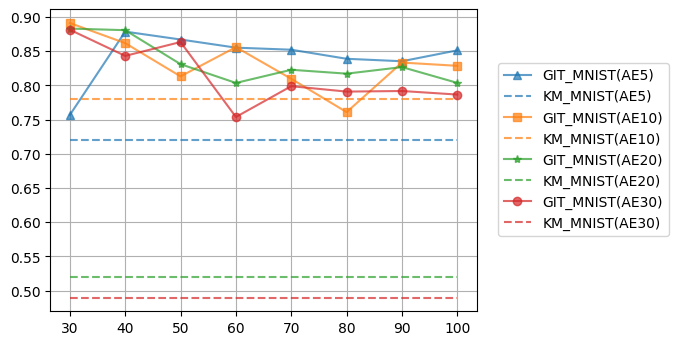

In [106]:
plt.figure(figsize=(5.5, 4),dpi=100)

plt.plot(K, AE_MNIST_5, label='GIT_MNIST(AE5)',marker='^',c='C0',alpha=0.7)
plt.plot(K, KM_AE_MNIST_5, label='KM_MNIST(AE5)',linestyle='dashed',c='C0',alpha=0.7)

plt.plot(K, AE_MNIST_10, label='GIT_MNIST(AE10)',marker='s',c='C1',alpha=0.7)
plt.plot(K, KM_AE_MNIST_10, label='KM_MNIST(AE10)',linestyle='dashed',c='C1',alpha=0.7)

plt.plot(K, AE_MNIST_20, label='GIT_MNIST(AE20)',marker='*',c='C2',alpha=0.7)
plt.plot(K, KM_AE_MNIST_20, label='KM_MNIST(AE20)',linestyle='dashed',c='C2',alpha=0.7)

plt.plot(K, AE_MNIST_30, label='GIT_MNIST(AE30)',marker='o',c='C3',alpha=0.7)
plt.plot(K, KM_AE_MNIST_30, label='KM_MNIST(AE30)',linestyle='dashed',c='C3',alpha=0.7)

plt.legend(loc=(1.05,0.25))
plt.grid(True)

plt.savefig('./AE_MNIST.png',bbox_inches = 'tight',pad_inches = 0.01,dpi=200)

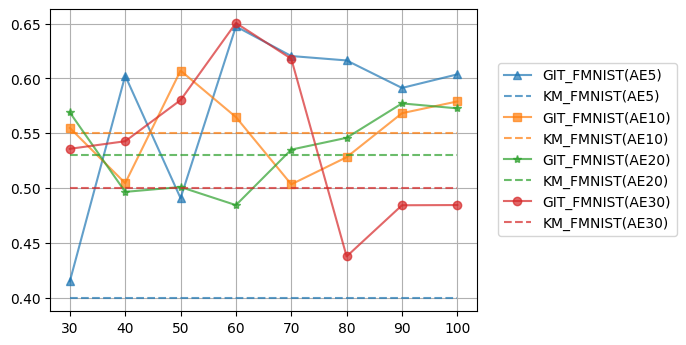

In [105]:
plt.figure(figsize=(5.5, 4),dpi=100)

plt.plot(K, AE_FMNIST_5, label='GIT_FMNIST(AE5)',marker='^',c='C0',alpha=0.7)
plt.plot(K, KM_AE_FMNIST_5, label='KM_FMNIST(AE5)',linestyle='dashed',c='C0',alpha=0.7)

plt.plot(K, AE_FMNIST_10, label='GIT_FMNIST(AE10)',marker='s',c='C1',alpha=0.7)
plt.plot(K, KM_AE_FMNIST_10, label='KM_FMNIST(AE10)',linestyle='dashed',c='C1',alpha=0.7)

plt.plot(K, AE_FMNIST_20, label='GIT_FMNIST(AE20)',marker='*',c='C2',alpha=0.7)
plt.plot(K, KM_AE_FMNIST_20, label='KM_FMNIST(AE20)',linestyle='dashed',c='C2',alpha=0.7)

plt.plot(K, AE_FMNIST_30, label='GIT_FMNIST(AE30)',marker='o',c='C3',alpha=0.7)
plt.plot(K, KM_AE_FMNIST_30, label='KM_FMNIST(AE30)',linestyle='dashed',c='C3',alpha=0.7)

plt.legend(loc=(1.05,0.25))
plt.grid(True)

plt.savefig('./AE_FMNIST.png',bbox_inches = 'tight',pad_inches = 0.01,dpi=200)

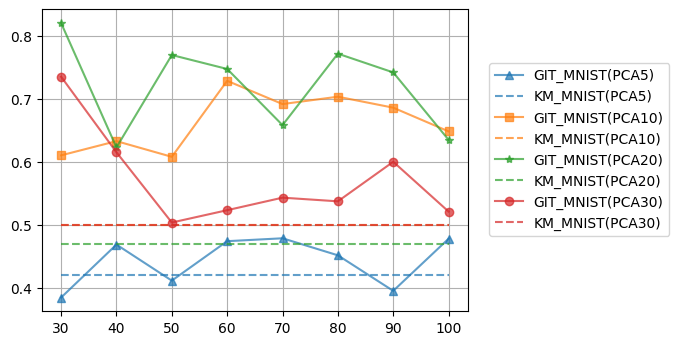

In [99]:
plt.figure(figsize=(5.5, 4),dpi=100)

plt.plot(K, PCA_MNIST_5, label='GIT_MNIST(PCA5)',marker='^',c='C0',alpha=0.7)
plt.plot(K, KM_PCA_MNIST_5, label='KM_MNIST(PCA5)',linestyle='dashed',c='C0',alpha=0.7)

plt.plot(K, PCA_MNIST_10, label='GIT_MNIST(PCA10)',marker='s',c='C1',alpha=0.7)
plt.plot(K, KM_PCA_MNIST_10, label='KM_MNIST(PCA10)',linestyle='dashed',c='C1',alpha=0.7)

plt.plot(K, PCA_MNIST_20, label='GIT_MNIST(PCA20)',marker='*',c='C2',alpha=0.7)
plt.plot(K, KM_PCA_MNIST_20, label='KM_MNIST(PCA20)',linestyle='dashed',c='C2',alpha=0.7)

plt.plot(K, PCA_MNIST_30, label='GIT_MNIST(PCA30)',marker='o',c='C3',alpha=0.7)
plt.plot(K, KM_PCA_MNIST_30, label='KM_MNIST(PCA30)',linestyle='dashed',c='C3',alpha=0.7)

plt.legend(loc=(1.05,0.25))
plt.grid(True)

plt.savefig('./PCA_MNIST.png',bbox_inches = 'tight',pad_inches = 0.01,dpi=200)

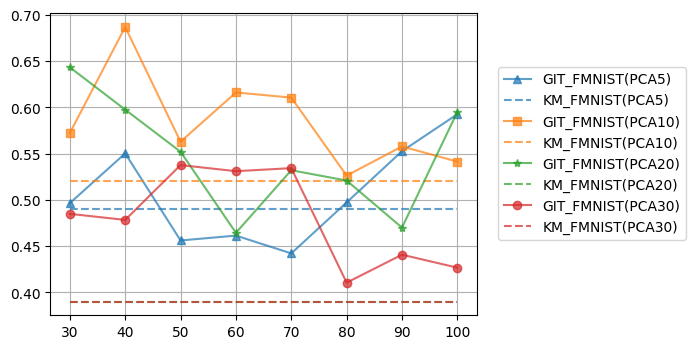

In [107]:
plt.figure(figsize=(5.5, 4),dpi=100)

plt.plot(K, PCA_FMNIST_5, label='GIT_FMNIST(PCA5)',marker='^',c='C0',alpha=0.7)
plt.plot(K, KM_PCA_FMNIST_5, label='KM_FMNIST(PCA5)',linestyle='dashed',c='C0',alpha=0.7)

plt.plot(K, PCA_FMNIST_10, label='GIT_FMNIST(PCA10)',marker='s',c='C1',alpha=0.7)
plt.plot(K, KM_PCA_FMNIST_10, label='KM_FMNIST(PCA10)',linestyle='dashed',c='C1',alpha=0.7)

plt.plot(K, PCA_FMNIST_20, label='GIT_FMNIST(PCA20)',marker='*',c='C2',alpha=0.7)
plt.plot(K, KM_PCA_FMNIST_20, label='KM_FMNIST(PCA20)',linestyle='dashed',c='C2',alpha=0.7)

plt.plot(K, PCA_FMNIST_30, label='GIT_FMNIST(PCA30)',marker='o',c='C3',alpha=0.7)
plt.plot(K, KM_PCA_FMNIST_30, label='KM_FMNIST(PCA30)',linestyle='dashed',c='C3',alpha=0.7)

plt.legend(loc=(1.05,0.25))
plt.grid(True)

plt.savefig('./PCA_FMNIST.png',bbox_inches = 'tight',pad_inches = 0.01,dpi=200)

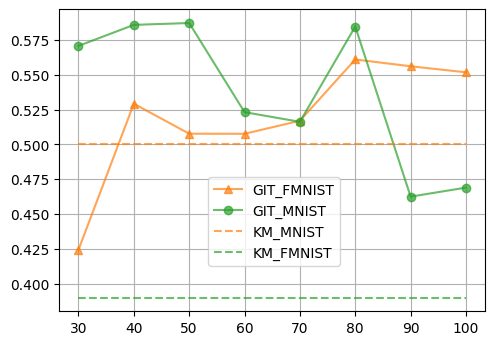

In [94]:
plt.figure(figsize=(5.5, 4),dpi=100)

plt.plot(K, FMNIST_784, label='GIT_FMNIST',marker='^',c='C1',alpha=0.7)
plt.plot(K, MNIST_784, label='GIT_MNIST',marker='o',c='C2',alpha=0.7)
plt.plot(K, KM_PCA_MNIST_784, label='KM_MNIST',linestyle='dashed',c='C1',alpha=0.7)
plt.plot(K, KM_PCA_FMNIST_784, label='KM_FMNIST',linestyle='dashed',c='C2',alpha=0.7)

plt.legend(loc=(0.35,0.15))
plt.grid(True)

plt.savefig('./784.png',bbox_inches = 'tight',pad_inches = 0.01,dpi=200)